In [1]:
import pytesseract
from pytesseract import Output
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,30)

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Acer\AppData\Local\Tesseract-OCR\tesseract.exe'

In [6]:
img = cv2.imread("inimg//im6.jpg")

In [7]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [8]:
d['text']

['', '', '', '', '13PHD1066']

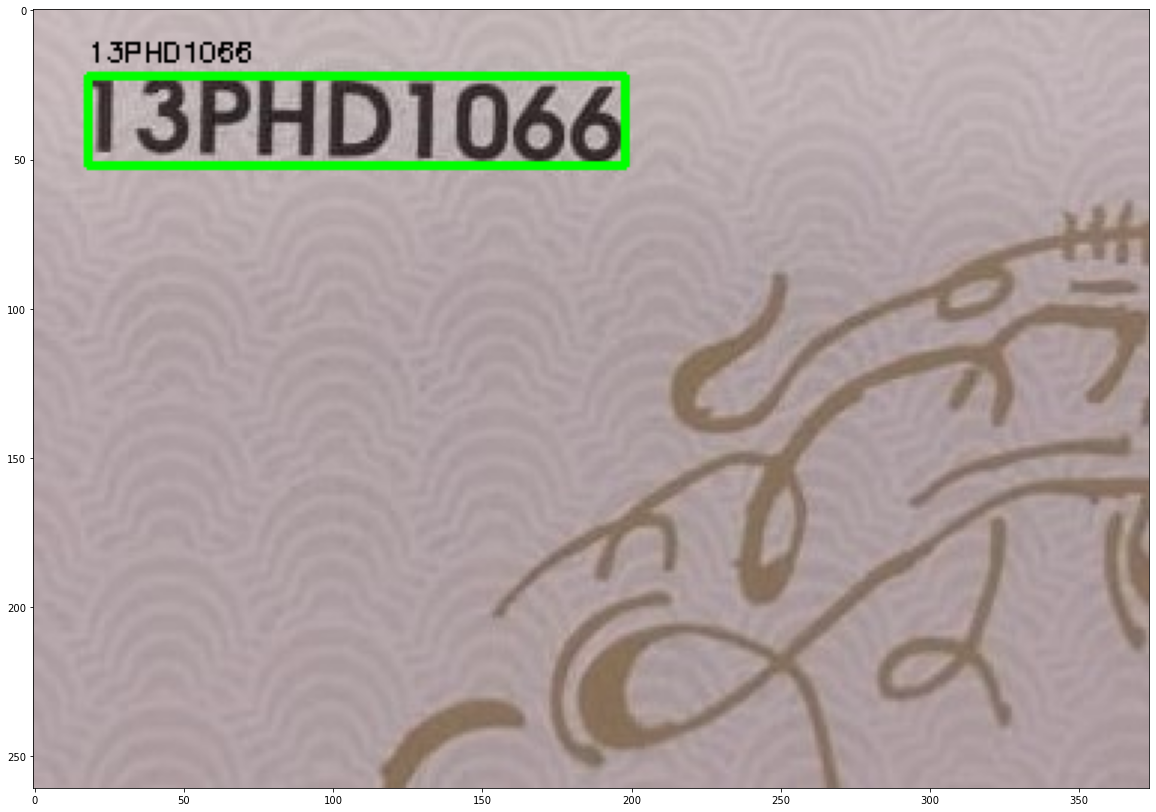

In [9]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
        img = cv2.putText(img, d['text'][i], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1) #Plotting texts on top of box
        
plt.imshow(img)

reg no: 18BEC1059


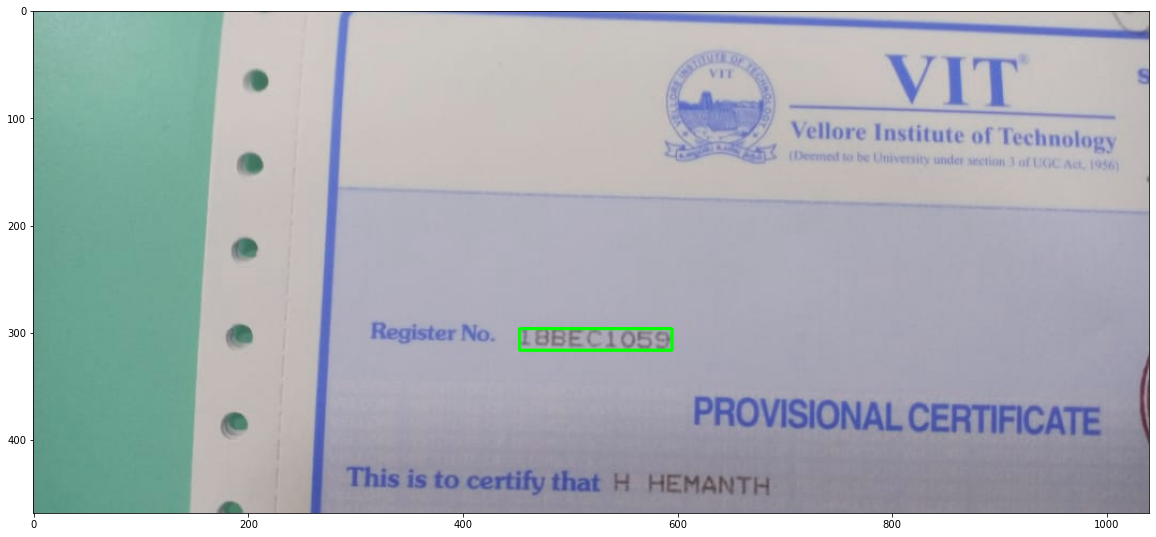

In [12]:
import re

email_pattern = '[0-9]{2}[A-Z]{3}[0-9]{4}'

img = cv2.imread("inimg//im3.jpg")

d = pytesseract.image_to_data(img, output_type=Output.DICT)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) >60 :
        if re.match(email_pattern, d['text'][i]) or d['text'][i-1].__contains__('Register'):
            (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
            img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
            print(f"reg no: {d['text'][i]}")
        
plt.imshow(img)